<a href="https://colab.research.google.com/github/yisuuum/practice/blob/main/try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2MB 70kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split,GridSearchCV

#Importing Machine Learning Model
from catboost import CatBoostRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

#statistical Tools
from sklearn import metrics

#To tranform data
from sklearn import preprocessing

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
data = pd.concat([train,test],ignore_index=True)
data.shape

(14204, 12)

In [ ]:
print(train.shape,test.shape)
print(train.shape[0]+test.shape[0])

(8523, 12) (5681, 11)
14204


In [ ]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14194,FDA01,15.00000,reg,0.05446,Canned,59.59040,OUT049,1999,Medium,Tier 1,Supermarket Type1,nan
14195,NCH42,6.86000,Low Fat,0.03659,Household,231.10100,OUT049,1999,Medium,Tier 1,Supermarket Type1,nan
14196,FDF46,7.07000,Low Fat,0.09405,Snack Foods,116.08340,OUT018,2009,Medium,Tier 3,Supermarket Type2,nan
14197,DRL35,15.70000,Low Fat,0.03070,Hard Drinks,43.27700,OUT046,1997,Small,Tier 1,Supermarket Type1,nan
14198,FDW46,13.00000,Regular,0.07041,Snack Foods,63.44840,OUT049,1999,Medium,Tier 1,Supermarket Type1,nan
14199,FDB58,10.50000,Regular,0.01350,Snack Foods,141.31540,OUT046,1997,Small,Tier 1,Supermarket Type1,nan
14200,FDD47,7.60000,Regular,0.14299,Starchy Foods,169.14480,OUT018,2009,Medium,Tier 3,Supermarket Type2,nan
14201,NCO17,10.00000,Low Fat,0.07353,Health and Hygiene,118.74400,OUT045,2002,NaN,Tier 2,Supermarket Type1,nan
14202,FDJ26,15.30000,Regular,0.00000,Canned,214.62180,OUT017,2007,NaN,Tier 2,Supermarket Type1,nan
14203,FDU37,9.50000,Regular,0.10472,Canned,79.79600,OUT045,2002,NaN,Tier 2,Supermarket Type1,nan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,FDI04,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765.00000,NaN,NaN,NaN,12.79285,4.65250,4.55500,8.71000,12.60000,16.75000,21.35000
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204.00000,NaN,NaN,NaN,0.06595,0.05146,0.00000,0.02704,0.05402,0.09404,0.32839
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204.00000,NaN,NaN,NaN,141.00498,62.08694,31.29000,94.01200,142.24700,185.85560,266.88840
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204.00000,NaN,NaN,NaN,1997.83068,8.37166,1985.00000,1987.00000,1999.00000,2004.00000,2009.00000
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets Look at all the unique values in Columns

In [ ]:
#Extracting the unique values of each columns

for i in data.columns:
    print(i," : distinct_value")
    print(data[i].nunique(), ":No of unique values")
    print(data[i].unique())
    print("-"*30)
    print("")

Item_Identifier  : distinct_value
1559 :No of unique values
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
------------------------------

Item_Weight  : distinct_value
415 :No of unique values
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


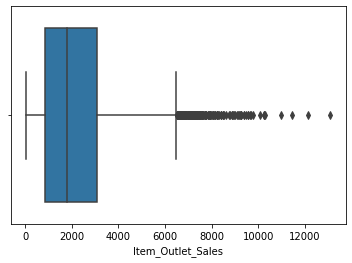

In [ ]:
sns.boxplot(train.Item_Outlet_Sales)

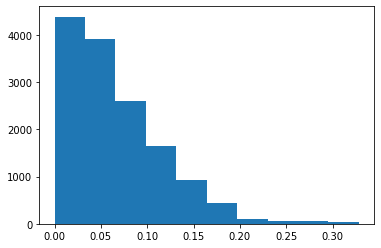

In [ ]:
plt.hist(data.Item_Visibility, bins=10)
plt.show()

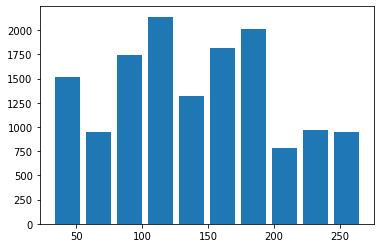

In [ ]:
plt.hist(data.Item_MRP, bins=10, rwidth=.8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


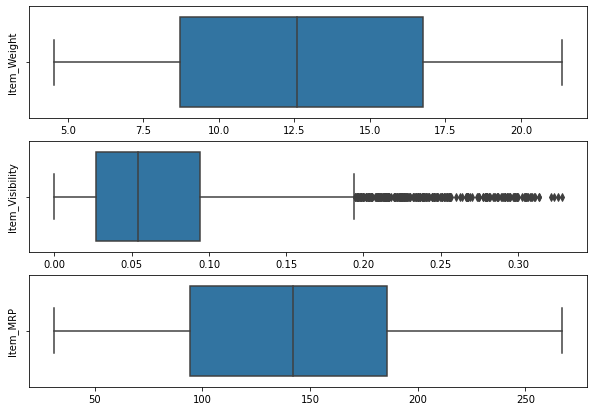

In [ ]:
plt.figure(figsize=(10,7))
for i, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    plt.subplot(3,1,i+1)
    sns.boxplot(data[col])
    plt.xlabel('')
    plt.ylabel(col)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


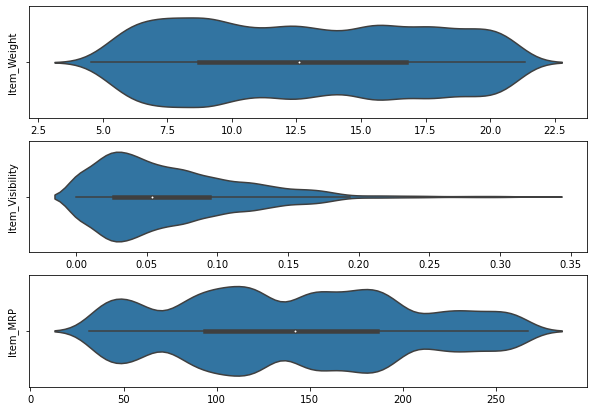

In [ ]:
plt.figure(figsize=(10,7))
for i, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    plt.subplot(3,1,i+1)
    sns.violinplot(data[col])
    plt.xlabel('')
    plt.ylabel(col)

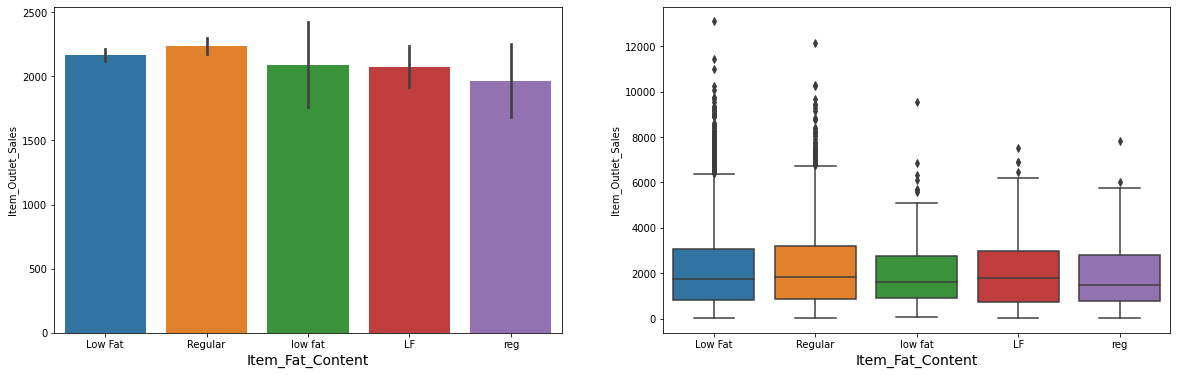

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=data, y='Item_Outlet_Sales', x='Item_Fat_Content')
plt.xlabel('Item_Fat_Content', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data=data, y='Item_Outlet_Sales', x='Item_Fat_Content')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


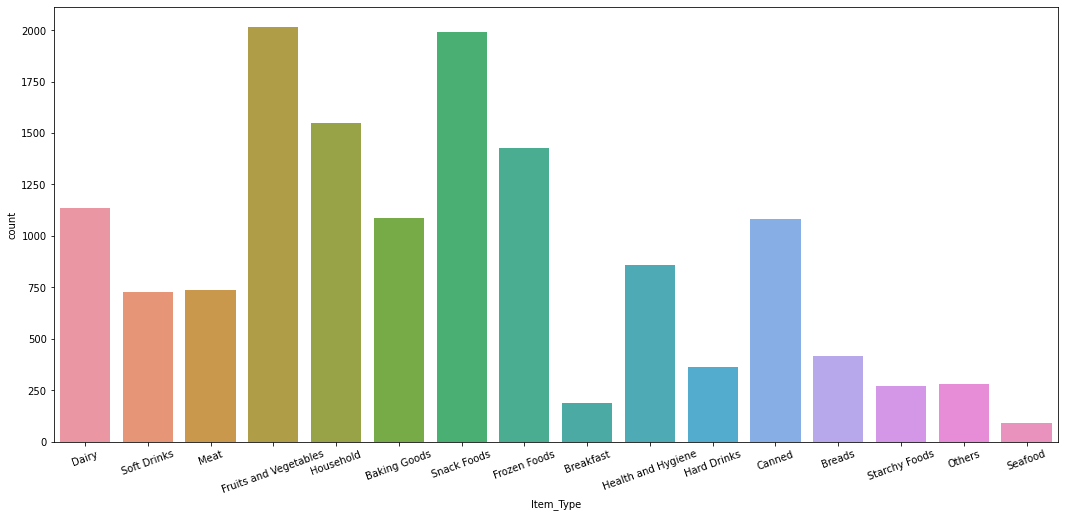

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data.Item_Type)
plt.xticks(rotation=20)
plt.show()

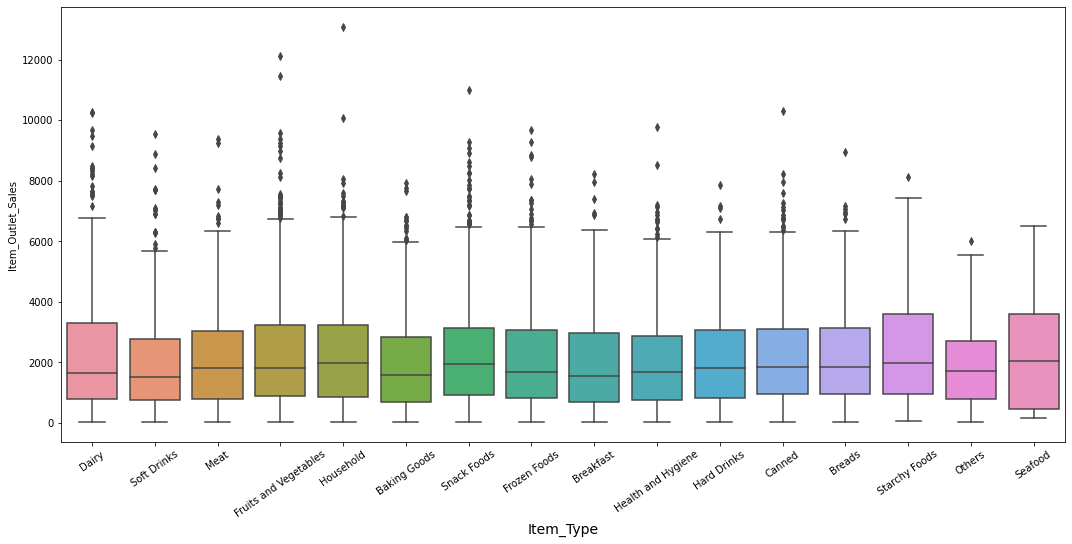

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data, y='Item_Outlet_Sales', x='Item_Type')
plt.xlabel('Item_Type', fontsize=14)
plt.xticks(rotation=35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


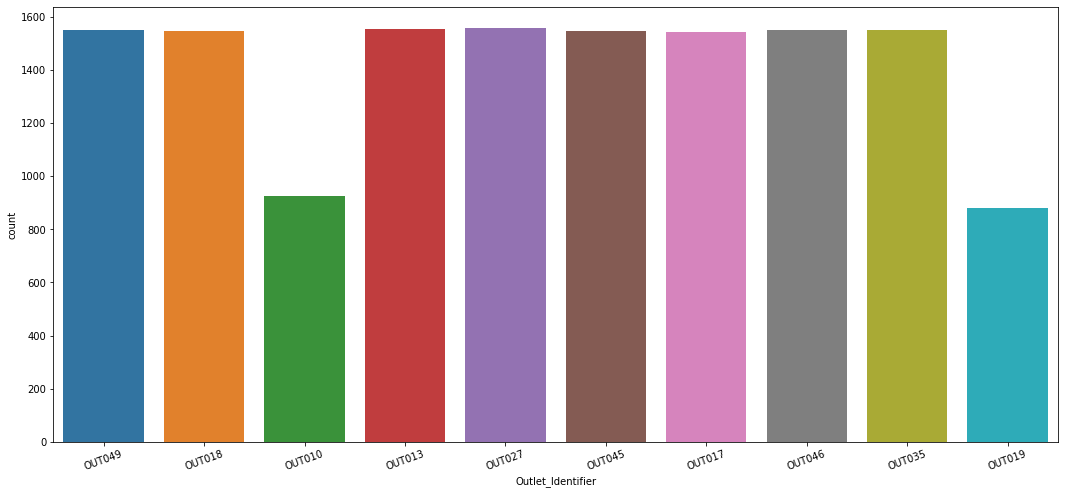

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data.Outlet_Identifier)
plt.xticks(rotation=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


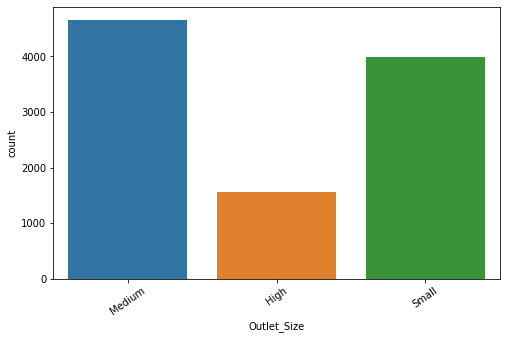

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data.Outlet_Size)
plt.xticks(rotation=35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


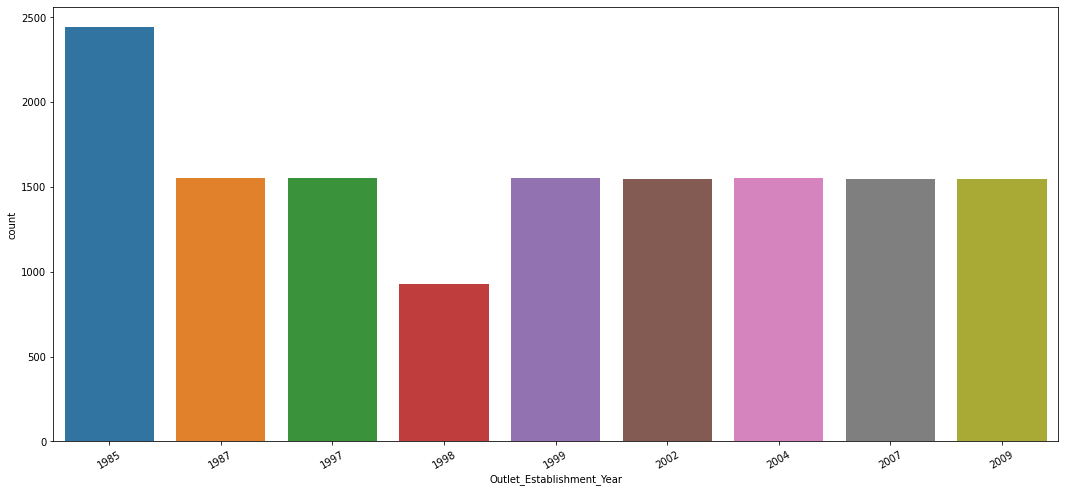

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data.Outlet_Establishment_Year)
plt.xticks(rotation=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


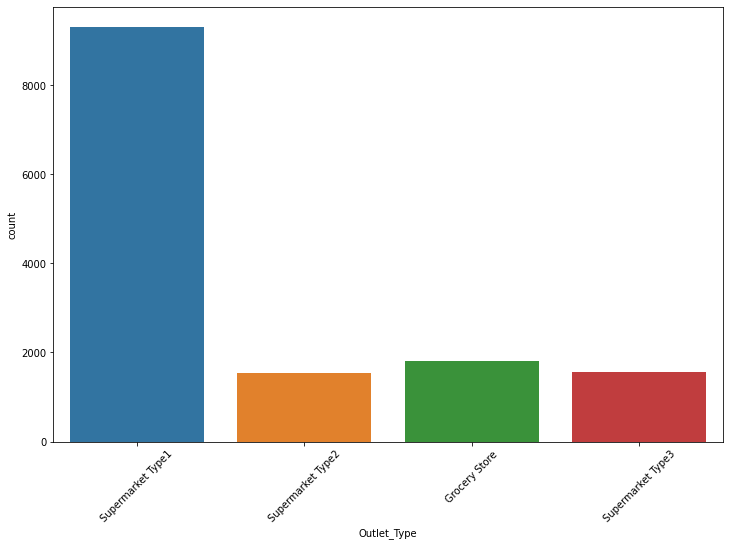

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=45)
plt.show()

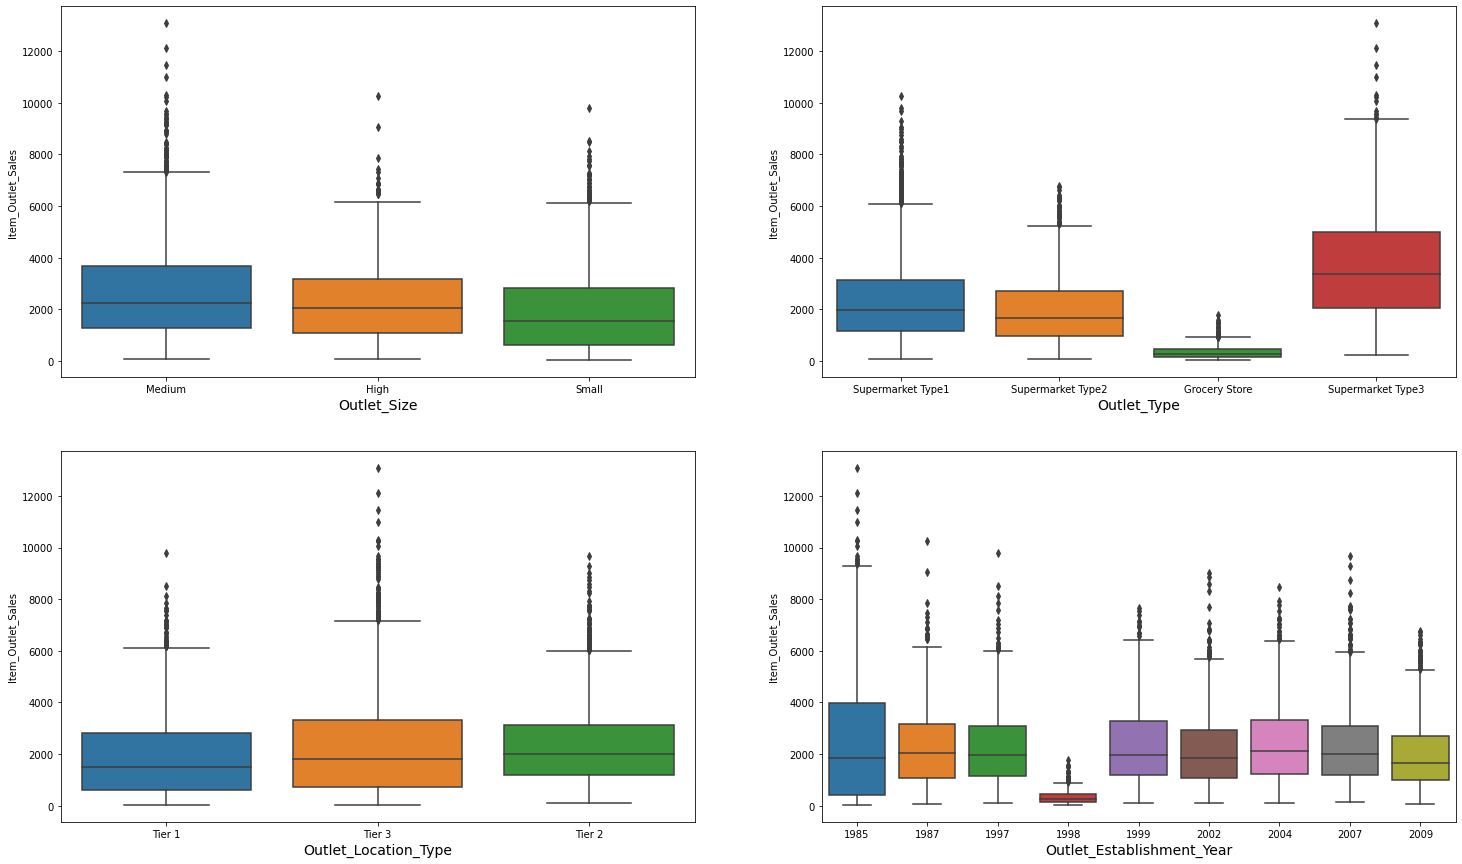

In [ ]:
plt.figure(figsize=(25,15))
outlet_col = [ 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type','Outlet_Establishment_Year']
for i, col in enumerate(outlet_col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data, y='Item_Outlet_Sales', x=col)
    plt.xlabel(col, fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


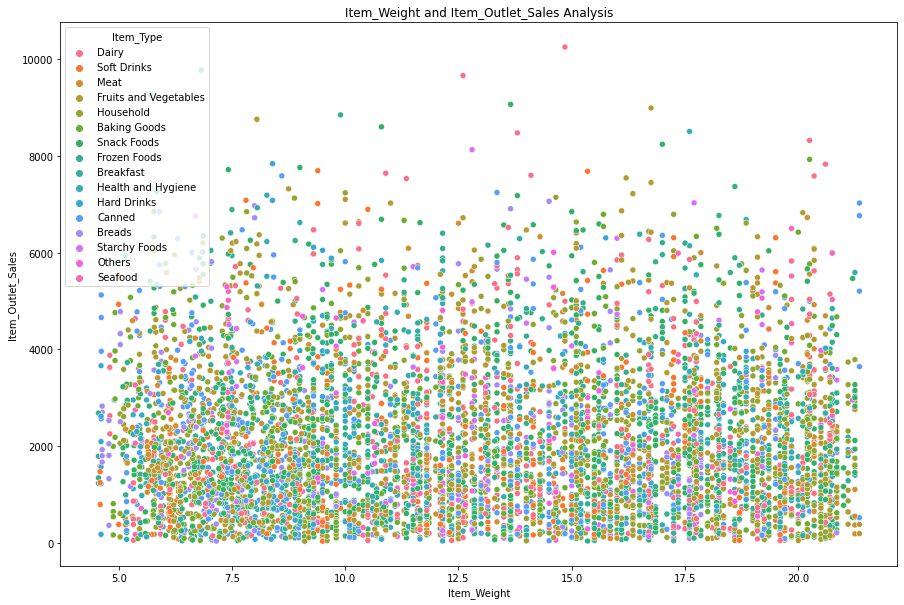

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(data.Item_Weight, data.Item_Outlet_Sales, hue=data.Item_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


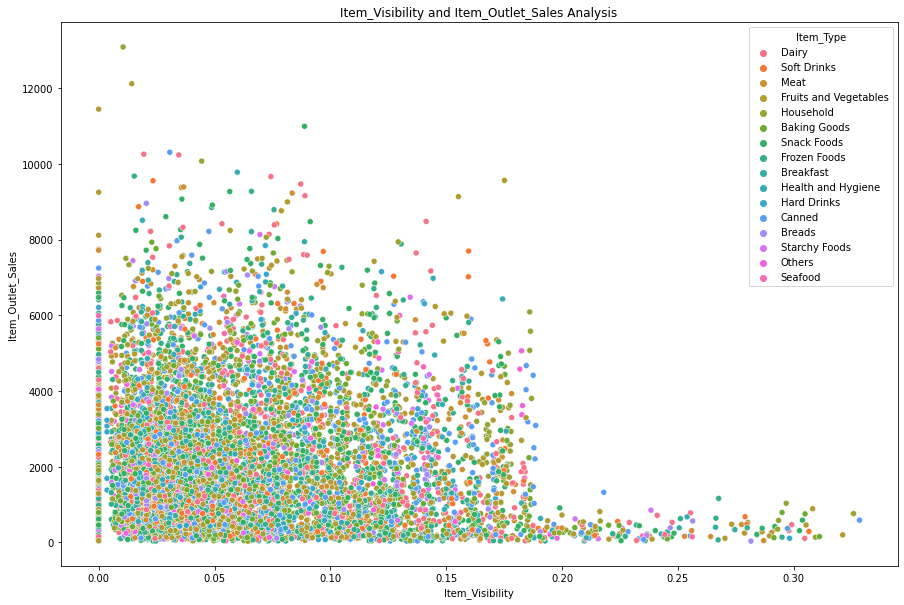

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
sns.scatterplot(data.Item_Visibility, data.Item_Outlet_Sales, hue=data.Item_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


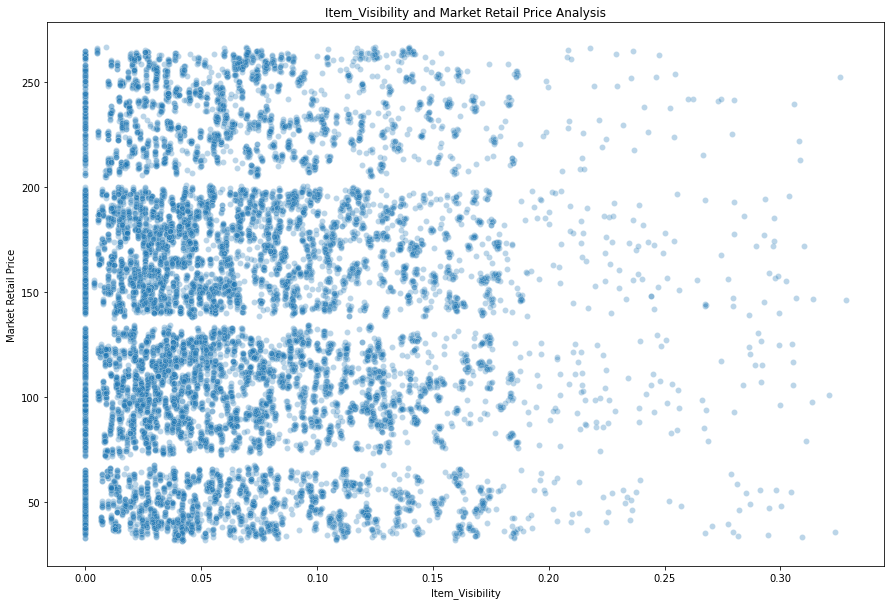

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibility")
plt.ylabel("Market Retail Price")
plt.title("Item_Visibility and Market Retail Price Analysis")
sns.scatterplot(data.Item_Visibility, data.Item_MRP, alpha=0.3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


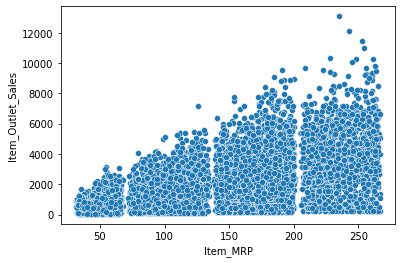

In [ ]:
sns.scatterplot(data.Item_MRP, data.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


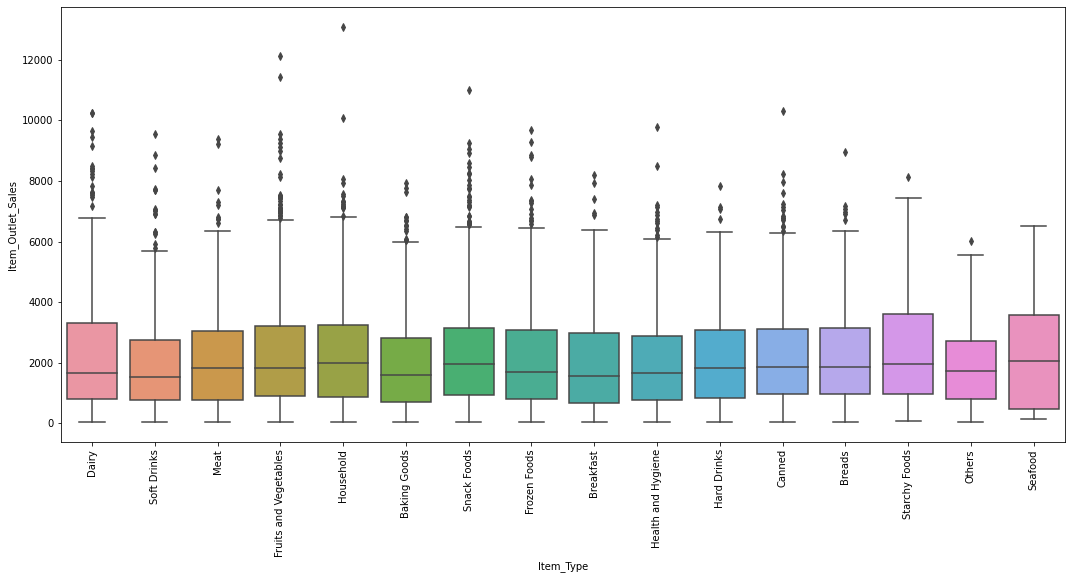

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data.Item_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


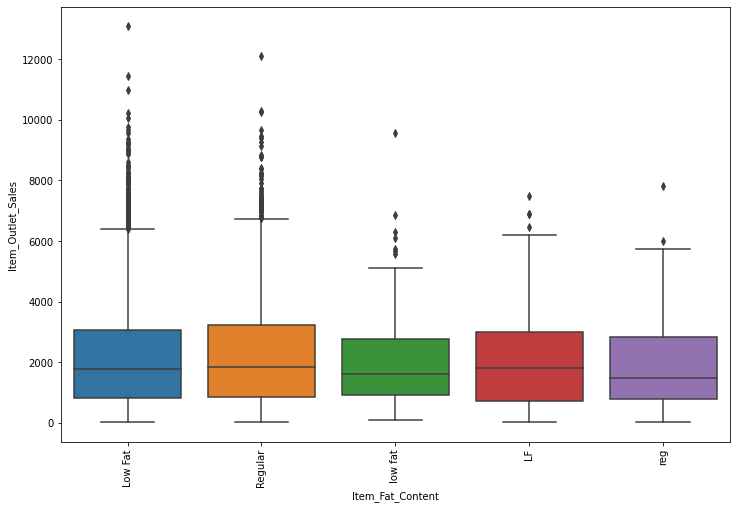

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data.Item_Fat_Content, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


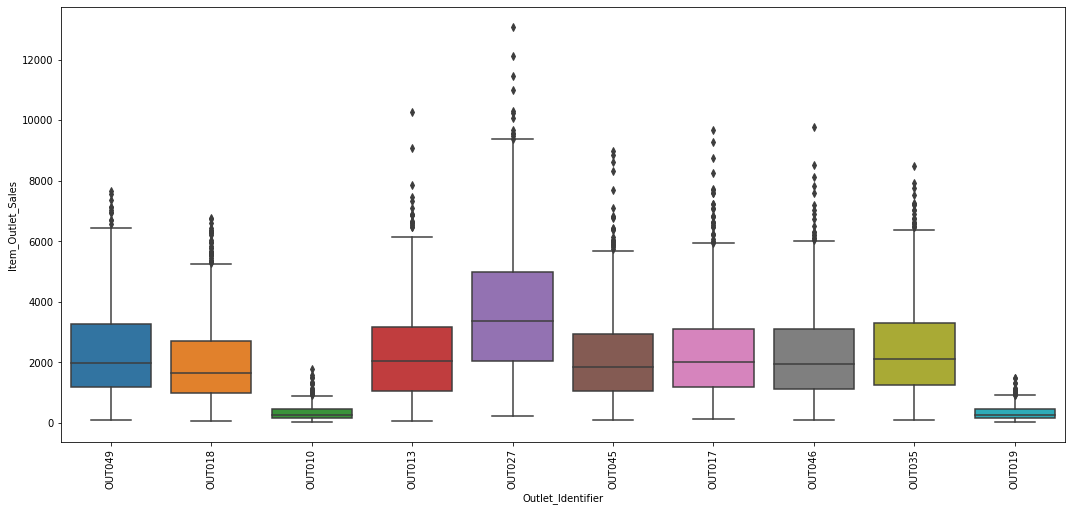

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data.Outlet_Identifier, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


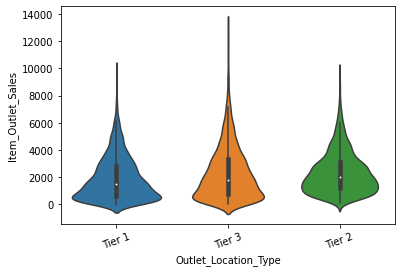

In [ ]:
sns.violinplot(data.Outlet_Location_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


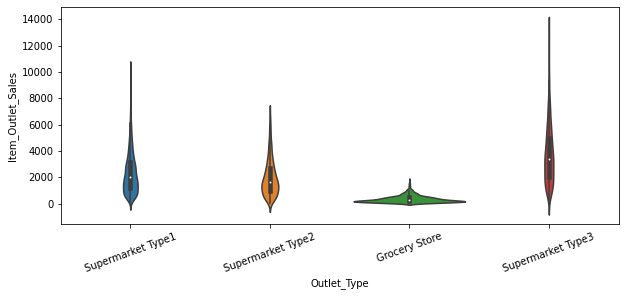

In [ ]:
plt.figure(figsize=(10,4))
sns.violinplot(data.Outlet_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


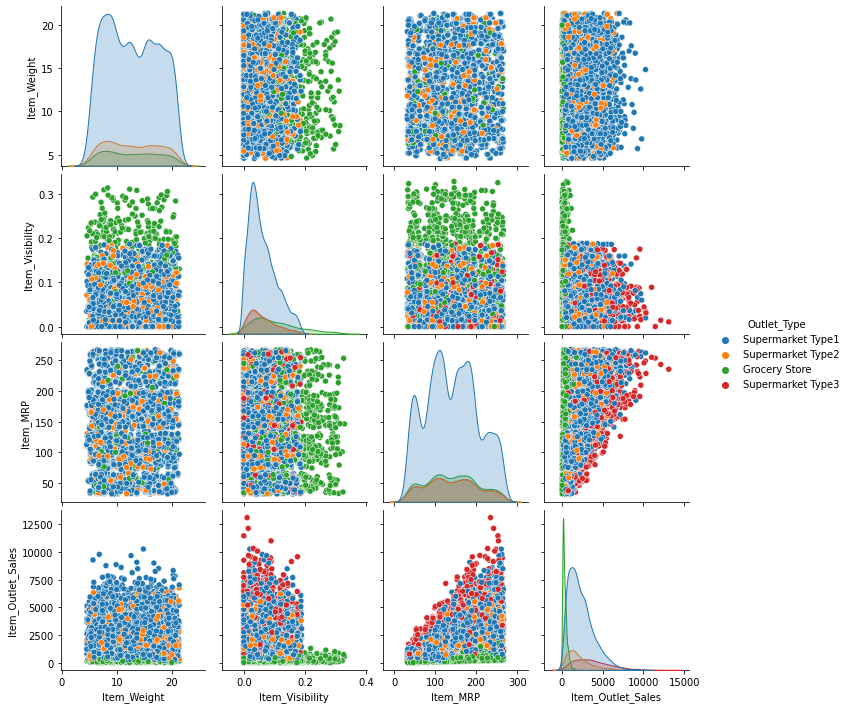

In [ ]:
sns.pairplot(data.drop(columns='Outlet_Establishment_Year'), hue='Outlet_Type')

In [ ]:
#We can see that we have some data missing

round(100*(data.isna().sum())/len(data), 2)

Item_Identifier              0.00000
Item_Weight                 17.17000
Item_Fat_Content             0.00000
Item_Visibility              0.00000
Item_Type                    0.00000
Item_MRP                     0.00000
Outlet_Identifier            0.00000
Outlet_Establishment_Year    0.00000
Outlet_Size                 28.27000
Outlet_Location_Type         0.00000
Outlet_Type                  0.00000
Item_Outlet_Sales           40.00000
dtype: float64

In [ ]:
#Looking for any '0' Values
data[data==0].sum()

Item_Identifier             0.00000
Item_Weight                 0.00000
Item_Fat_Content            0.00000
Item_Visibility             0.00000
Item_Type                   0.00000
Item_MRP                    0.00000
Outlet_Identifier           0.00000
Outlet_Establishment_Year   0.00000
Outlet_Size                 0.00000
Outlet_Location_Type        0.00000
Outlet_Type                 0.00000
Item_Outlet_Sales           0.00000
dtype: float64

1. Filling the mssing data in Item_weight with mean
2. Because every item should have some weight


In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


In [ ]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00000,-0.01364,0.03300,0.00046,0.01108
Item_Visibility,-0.01364,1.00000,-0.00635,-0.08368,-0.12862
Item_MRP,0.03300,-0.00635,1.00000,0.00014,0.56757
Outlet_Establishment_Year,0.00046,-0.08368,0.00014,1.00000,-0.04913
Item_Outlet_Sales,0.01108,-0.12862,0.56757,-0.04913,1.00000


In [ ]:
#Checking the Correlation between data with respect to target

data.corr()['Item_Outlet_Sales']

Item_Weight                  0.01108
Item_Visibility             -0.12862
Item_MRP                     0.56757
Outlet_Establishment_Year   -0.04913
Item_Outlet_Sales            1.00000
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Correlation between different attributes')

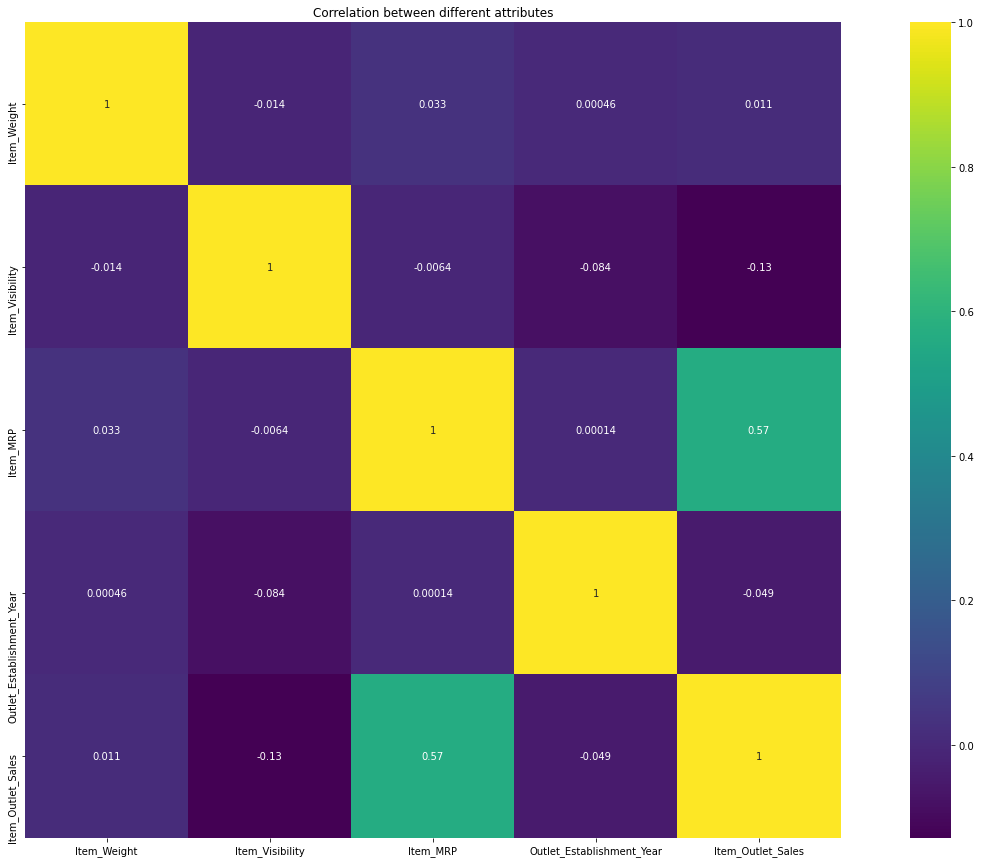

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


In [ ]:
item_visiblity_avg = data.pivot_table( index = 'Item_Identifier', values = 'Item_Visibility')
item_visiblity_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.03494
DRA24,0.04565
DRA59,0.13338
DRB01,0.07974
DRB13,0.00680


In [ ]:
data['Item_visiblity_avg'] = data.apply(lambda x: x['Item_Visibility']/item_visiblity_avg['Item_Visibility'][item_visiblity_avg.index==x['Item_Identifier']][0], axis=1).astype(float)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity_avg
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0.93108
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280,0.93342
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0.96007
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000,0.00000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,0.00000


In [ ]:
data['Item_Visibility'], _ = stats.boxcox(data['Item_Visibility'] + 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


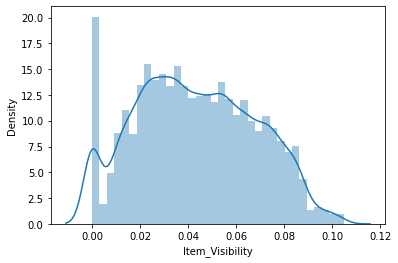

In [ ]:
sns.distplot(data['Item_Visibility'])

In [ ]:
'''

We saw that in Item_identifier 1st 2 character's are common and other characters describes about the product

So we can extract those characters to simplify our dataset

'''

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity_avg,Item_Type_Combined
0,FDA15,9.30000,Low Fat,0.01486,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0.93108,FD
1,DRC01,5.92000,Regular,0.01759,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280,0.93342,DR
2,FDN15,17.50000,Low Fat,0.01547,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0.96007,FD
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000,0.00000,FD
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,0.00000,NC


Rearranging the Columns To get the better view of data

In [ ]:
columns = ['Item_Identifier', 'Item_Type_Combined','Item_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility',
        'Item_visiblity_avg', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
data = data[columns]
data.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,Dairy,Low Fat,9.30000,0.01486,0.93108,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,DR,Soft Drinks,Regular,5.92000,0.01759,0.93342,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,FD,Meat,Low Fat,17.50000,0.01547,0.96007,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,FD,Fruits and Vegetables,Regular,19.20000,0.00000,0.00000,182.09500,OUT010,1998,NaN,Tier 3,Grocery Store,732.38000
4,NCD19,NC,Household,Low Fat,8.93000,0.00000,0.00000,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


In [ ]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       245178.18680
                   Hard Drinks                 457793.42720
                   Soft Drinks                 892897.72200
FD                 Baking Goods               1265525.34220
                   Breads                      553237.18880
                   Breakfast                   232298.95160
                   Canned                     1444151.49260
                   Dairy                      1277415.86440
                   Frozen Foods               1825734.78860
                   Fruits and Vegetables      2820059.81680
                   Meat                        917565.61200
                   Seafood                     148868.21940
                   Snack Foods                2732786.08700
                   Starchy Foods               351401.25040
NC                 Health and Hygiene         1045200.13780
                   Household                  2055493.71320
                   Others                      325517.60960

After we extract 1st 2 characters from Item_identifier we saw that it means to certain item type
Now, we can rename them accordingly

In [ ]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

We saw that Outlet_size have some Nan Values Lets fill them with 'Not_specified' for now. We will work later for it.

In [ ]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Not_specified')
data['Outlet_Size'].value_counts()

Medium           4655
Not_specified    4016
Small            3980
High             1553
Name: Outlet_Size, dtype: int64

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

After looking closely we get that ["LF"," Low Fat"," low fat"] & ["Regular","reg"] are same and just acronyms

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Size   Outlet_Type                         
Tier 1               Medium        Supermarket Type1      2183969.81020
                     Small         Grocery Store           179694.09360
                                   Supermarket Type1      2118395.16820
Tier 2               Not_specified Supermarket Type1      4204190.77100
                     Small         Supermarket Type1      2268122.93540
Tier 3               High          Supermarket Type1      2142663.57820
                     Medium        Supermarket Type2      1851822.83000
                                   Supermarket Type3      3453926.05140
                     Not_specified Grocery Store           188340.17240

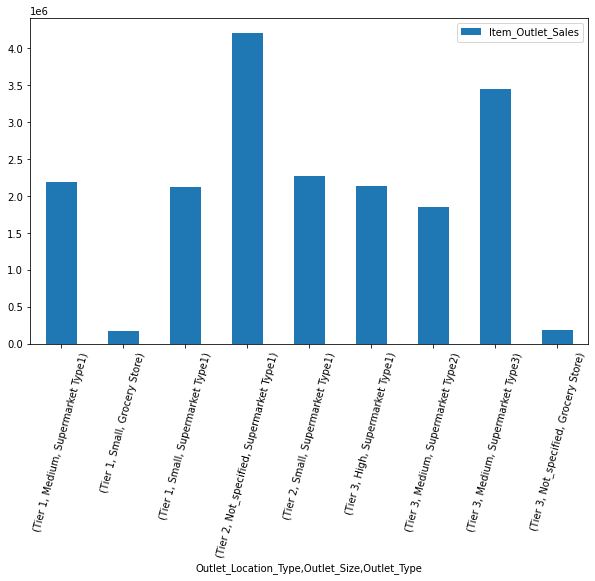

In [ ]:
plot_outlet = data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)
plot_outlet.plot(kind='bar',figsize = (10,6))
plt.xticks(rotation=75)
plt.show()

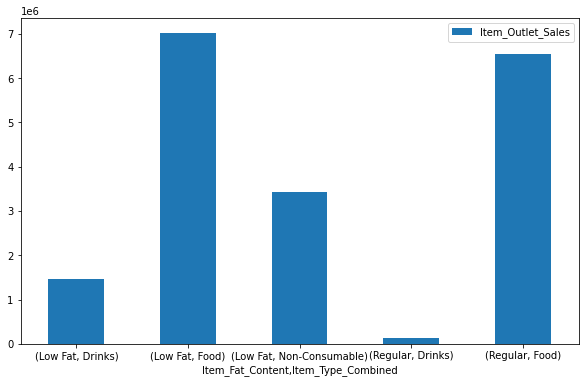

In [ ]:
plot_item = data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined'],aggfunc='sum')
plot_item.plot(kind='bar',figsize = (10,6))
plt.xticks(rotation=0)
plt.show()

In [ ]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drinks             Dairy                       245178.18680
                                    Hard Drinks                 457793.42720
                                    Soft Drinks                 761259.07500
                 Food               Baking Goods                580523.67020
                                    Breads                      305680.76440
                                    Breakfast                    99441.89060
                                    Canned                      753171.60240
                                    Dairy                       651504.60820
                                    Frozen Foods                952890.96260
                                    Fruits and Vegetables      1374915.61640
                                    Meat                        346054.87640
                                    Seafood                      70588.11600
                                    Snack Foods                1669089.35940
                                    Starchy Foods               209790.91680
                 Non-Consumable     Health and Hygiene         1045200.13780
                                    Household                  2055493.71320
                                    Others                      325517.60960
Regular          Drinks             Soft Drinks                 131638.64700
                 Food               Baking Goods                685001.67200
                                    Breads                      247556.42440
                                    Breakfast                   132857.06100
                                    Canned                      690979.89020
                                    Dairy                       625911.25620
                                    Frozen Foods                872843.82600
                                    Fruits and Vegetables      1445144.20040
                                    Meat                        571510.73560
                                    Seafood                      78280.10340
                                    Snack Foods                1063696.72760
                                    Starchy Foods               141610.33360

From above table we saw that Non_Consumable goods don't fit with Low_Fat.
So lets change them accordingly
Products looks like Household Items and lets it to Household

In [ ]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Household"

In [ ]:
plot_identifier = data.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.sum)
plot_identifier

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,188340.17240
OUT013,2142663.57820
OUT017,2167465.29400
OUT018,1851822.83000
OUT019,179694.09360
OUT027,3453926.05140
OUT035,2268122.93540
OUT045,2036725.47700
OUT046,2118395.16820


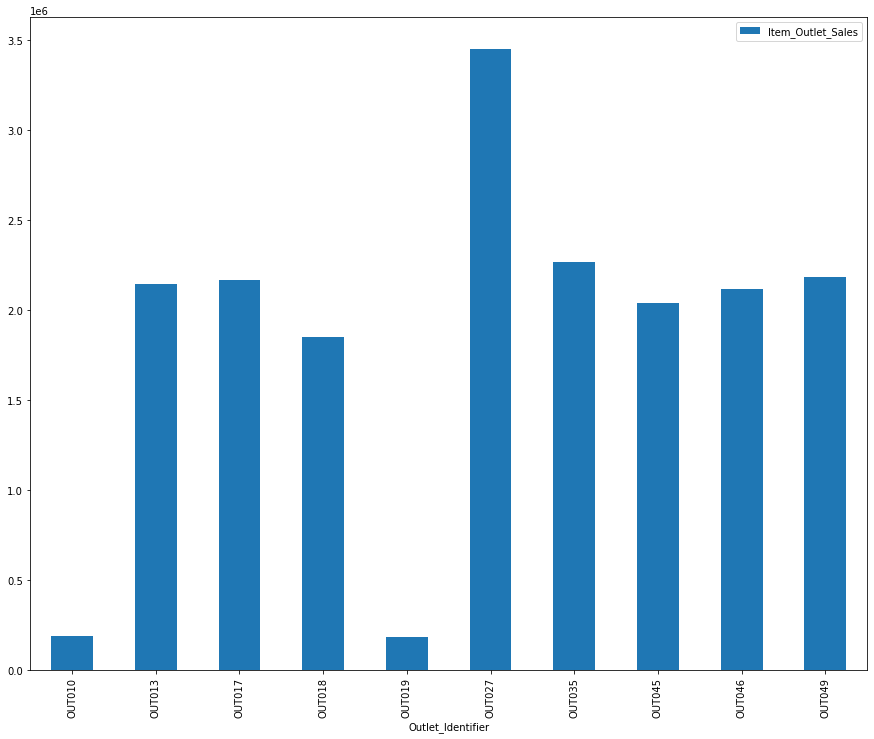

In [ ]:
plot_identifier.plot(kind='bar',figsize = (15,12))
plt.show()

In [ ]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Size   Outlet_Identifier                   
Grocery Store     Tier 1               Small         OUT019                  179694.09360
                  Tier 3               Not_specified OUT010                  188340.17240
Supermarket Type1 Tier 1               Medium        OUT049                 2183969.81020
                                       Small         OUT046                 2118395.16820
                  Tier 2               Not_specified OUT017                 2167465.29400
                                                     OUT045                 2036725.47700
                                       Small         OUT035                 2268122.93540
                  Tier 3               High          OUT013                 2142663.57820
Supermarket Type2 Tier 3               Medium        OUT018                 1851822.83000
Supermarket Type3 Tier 3               Medium        OUT027                 3453926.05140

In [ ]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    188340.17240
OUT013   2142663.57820
OUT017   2167465.29400
OUT018   1851822.83000
OUT019    179694.09360
OUT027   3453926.05140
OUT035   2268122.93540
OUT045   2036725.47700
OUT046   2118395.16820
OUT049   2183969.81020
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

1. When we look Closely Grocery Store have the Lowest Sales
2. Supermarket Type3 have the Highest sale

After Carefully analyzing Outlet_size and Outlet_Identifier with Sales and Total Number of each Outlet_Identifier I think some Outlet_Identifier are in wrong Outlet_Size lets fix them

In [ ]:
data.loc[data['Outlet_Identifier']=="OUT010",'Outlet_Size'] = "Small"

data.loc[data['Outlet_Identifier']=="OUT019",'Outlet_Size'] = "Small"

data.loc[data['Outlet_Identifier']=="OUT027",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT017",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT045",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT035",'Outlet_Size'] = "Medium"

data.loc[data['Outlet_Identifier']=="OUT046",'Outlet_Size'] = "Medium"

In [ ]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Size Outlet_Identifier                   
High        OUT013                 2142663.57820
            OUT017                 2167465.29400
            OUT027                 3453926.05140
            OUT045                 2036725.47700
Medium      OUT018                 1851822.83000
            OUT035                 2268122.93540
            OUT046                 2118395.16820
            OUT049                 2183969.81020
Small       OUT010                  188340.17240
            OUT019                  179694.09360

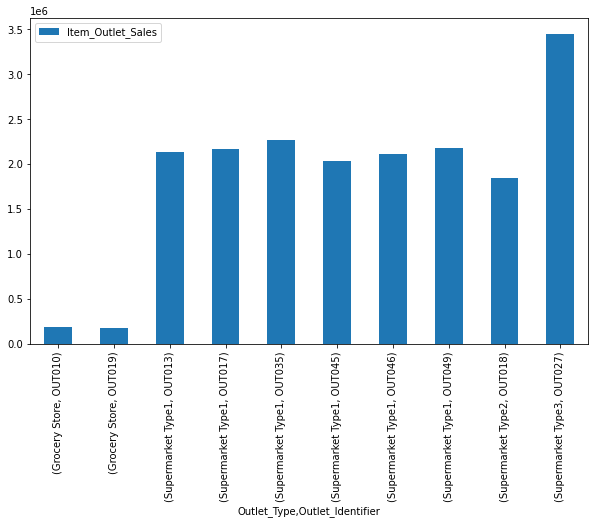

In [ ]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Identifier'],aggfunc=np.sum).plot(kind='bar',figsize = (10,6))
plt.show()

In [ ]:
perishable = ["Breads", "Breakfast", "Dairy", "Snack Foods",
               "Fruits and Vegetables", "Meat", "Seafood", "Starchy Foods"]

non_perishable = ["Baking Goods", "Canned", "Frozen Foods", 
                   "Hard Drinks", "Health and Hygiene",
                   "Household", "Soft Drinks"]

In [ ]:
def filter_data(item):
    if item in perishable:
        return 'perishable'
    elif item in non_perishable:
        return 'non_perishable'
    else:
        return'Not_Known'
    
data['Item_Type_New'] = data.Item_Type.apply(filter_data)

In [ ]:
data.Item_Type_New.value_counts()

non_perishable    7090
perishable        6834
Not_Known          280
Name: Item_Type_New, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


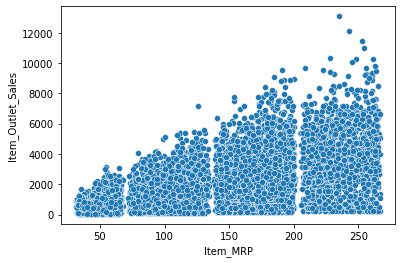

In [ ]:
sns.scatterplot(data.Item_MRP, data.Item_Outlet_Sales)

In [ ]:
data['Item_MRP_cat'] = pd.cut(data.Item_MRP, bins=[31,69,137,203,270], labels=['a','b','c','d'])

In [ ]:
data.groupby(['Item_Type_Combined', 'Item_Type_New', 'Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type_Combined  Item_Type_New   Item_Type            
Drinks              non_perishable  Hard Drinks              457793.42720
                                    Soft Drinks              892897.72200
                    perishable      Dairy                    245178.18680
Food                non_perishable  Baking Goods            1265525.34220
                                    Canned                  1444151.49260
                                    Frozen Foods            1825734.78860
                    perishable      Breads                   553237.18880
                                    Breakfast                232298.95160
                                    Dairy                   1277415.86440
                                    Fruits and Vegetables   2820059.81680
                                    Meat                     917565.61200
                                    Seafood                  148868.21940
                                    Snack Foods       

In [ ]:
data['MRP_per_unit_weight'] = data.Item_MRP/data.Item_Weight    

In [ ]:
data['Outlet_Years'] = 2020 - data['Outlet_Establishment_Year']

In [ ]:
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

In [ ]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[3:5])

In [ ]:
data.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Item_MRP_cat,MRP_per_unit_weight,Outlet_Years
0,15,Food,Dairy,Low Fat,9.30000,0.01486,0.65808,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800,perishable,d,26.86120,21
1,01,Drinks,Soft Drinks,Regular,5.92000,0.01759,0.65929,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280,non_perishable,a,8.15358,11
2,15,Food,Meat,Low Fat,17.50000,0.01547,0.67298,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000,perishable,c,8.09246,21
3,07,Food,Fruits and Vegetables,Regular,19.20000,0.00000,0.00000,182.09500,OUT010,1998,Small,Tier 3,Grocery Store,732.38000,perishable,c,9.48411,22
4,19,Non-Consumable,Household,Household,8.93000,0.00000,0.00000,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,non_perishable,a,6.03151,33


In [ ]:
data.corr()

,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_Years
Item_Weight,1.00000,-0.01399,-0.00508,0.03300,0.01108,-0.58276,-0.00046
Item_Visibility,-0.01399,1.00000,0.49127,-0.00007,-0.10059,-0.00568,0.06375
Item_visiblity_avg,-0.00508,0.49127,1.00000,0.00197,-0.18884,-0.00956,0.12338
Item_MRP,0.03300,-0.00007,0.00197,1.00000,0.56757,0.70448,-0.00014
Item_Outlet_Sales,0.01108,-0.10059,-0.18884,0.56757,1.00000,0.39138,0.04913
MRP_per_unit_weight,-0.58276,-0.00568,-0.00956,0.70448,0.39138,1.00000,-0.06107
Outlet_Years,-0.00046,0.06375,0.12338,-0.00014,0.04913,-0.06107,1.00000


In [ ]:
data['Item_visiblity_avg'] = np.log(data['Item_visiblity_avg'] + 1)

Text(0.5, 1.0, 'Correlation between different attributes')

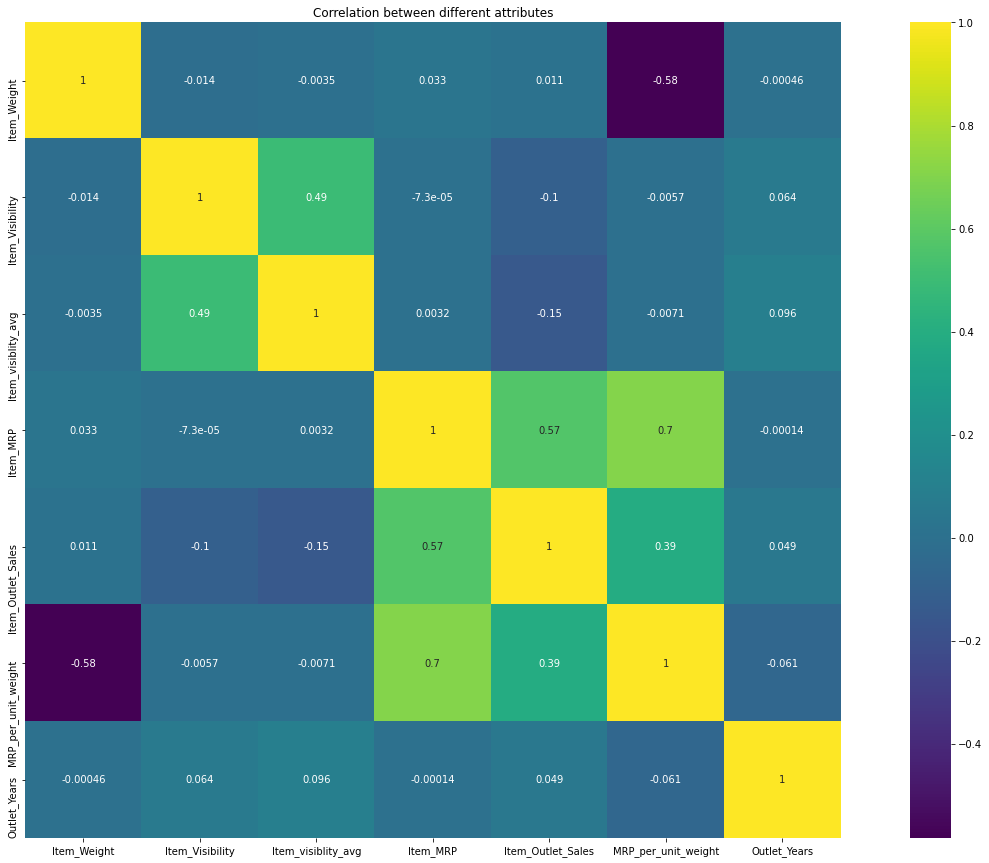

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")

In [ ]:
df = data.copy()

In [ ]:
df_train = df.iloc[0:train.shape[0]]
df_test = df.iloc[train.shape[0]:]

In [ ]:
print(df_train.shape,df_test.shape)

(8523, 18) (5681, 18)


Now we will do predict our data with get_dummies

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Type_Combined         14204 non-null  object  
 2   Item_Type                  14204 non-null  object  
 3   Item_Fat_Content           14204 non-null  object  
 4   Item_Weight                14204 non-null  float64 
 5   Item_Visibility            14204 non-null  float64 
 6   Item_visiblity_avg         14204 non-null  float64 
 7   Item_MRP                   14204 non-null  float64 
 8   Outlet_Identifier          14204 non-null  object  
 9   Outlet_Establishment_Year  14204 non-null  category
 10  Outlet_Size                14204 non-null  object  
 11  Outlet_Location_Type       14204 non-null  object  
 12  Outlet_Type                14204 non-null  object  
 13  Item_Outlet_Sales          8523

In [ ]:
df_train.select_dtypes(include='float').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_visiblity_avg', 'Item_MRP',
       'Item_Outlet_Sales', 'MRP_per_unit_weight'],
      dtype='object')

In [ ]:
df_train = pd.get_dummies(df_train)

In [ ]:
df_train.corr()['Item_Outlet_Sales']

Item_Weight                          0.01108
Item_Visibility                     -0.10059
Item_visiblity_avg                  -0.14894
Item_MRP                             0.56757
Item_Outlet_Sales                    1.00000
MRP_per_unit_weight                  0.39138
Outlet_Years                         0.04913
Item_Identifier_01                  -0.00564
Item_Identifier_02                   0.00736
Item_Identifier_03                   0.00040
Item_Identifier_04                  -0.02477
Item_Identifier_05                   0.00644
Item_Identifier_06                   0.00443
Item_Identifier_07                  -0.01714
Item_Identifier_08                  -0.00829
Item_Identifier_09                  -0.00299
Item_Identifier_10                  -0.03370
Item_Identifier_11                   0.02217
Item_Identifier_12                  -0.01436
Item_Identifier_13                  -0.02104
Item_Identifier_14                  -0.02391
Item_Identifier_15                   0.00805
Item_Ident

In [ ]:
df_train.head()

,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_Years,Item_Identifier_01,Item_Identifier_02,Item_Identifier_03,Item_Identifier_04,Item_Identifier_05,Item_Identifier_06,Item_Identifier_07,Item_Identifier_08,Item_Identifier_09,Item_Identifier_10,Item_Identifier_11,Item_Identifier_12,Item_Identifier_13,Item_Identifier_14,Item_Identifier_15,Item_Identifier_16,Item_Identifier_17,Item_Identifier_18,Item_Identifier_19,Item_Identifier_20,Item_Identifier_21,Item_Identifier_22,Item_Identifier_23,Item_Identifier_24,Item_Identifier_25,Item_Identifier_26,Item_Identifier_27,Item_Identifier_28,Item_Identifier_29,Item_Identifier_30,Item_Identifier_31,Item_Identifier_32,Item_Identifier_33,Item_Identifier_34,Item_Identifier_35,Item_Identifier_36,Item_Identifier_37,Item_Identifier_38,Item_Identifier_39,Item_Identifier_40,Item_Identifier_41,Item_Identifier_42,Item_Identifier_43,Item_Identifier_44,Item_Identifier_45,Item_Identifier_46,Item_Identifier_47,Item_Identifier_48,Item_Identifier_49,Item_Identifier_50,Item_Identifier_51,Item_Identifier_52,Item_Identifier_53,Item_Identifier_54,Item_Identifier_55,Item_Identifier_56,Item_Identifier_57,Item_Identifier_58,Item_Identifier_59,Item_Identifier_60,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Household,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Not_Known,Item_Type_New_non_perishable,Item_Type_New_perishable,Item_MRP_cat_a,Item_MRP_cat_b,Item_MRP_cat_c,Item_MRP_cat_d
0,9.30000,0.01486,0.50566,249.80920,3735.13800,26.86120,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
1,5.92000,0.01759,0.50639,48.26920,443.42280,8.15358,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
2,17.50000,0.01547,0.51461,141.61800,2097.27000,8.09246,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,19.20000,0.00000,0.00000,182.09500,732.38000,9.48411,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
4,8.93000,0.00000,0.00000,53.86140,994.70520,6.03151,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_train.shape

(8523, 125)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 125 entries, Item_Weight to Item_MRP_cat_d
dtypes: float64(6), int64(1), uint8(118)
memory usage: 1.4 MB


In [ ]:
df_x = df_train.drop(['Item_Outlet_Sales'], axis=1)
df_y = df_train['Item_Outlet_Sales']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y, train_size=0.8, random_state=10)

In [ ]:
#pip install --upgrade git+https://github.com/stanfordmlgroup/ngboost.git

In [ ]:
lr = LinearRegression()

rfc = ensemble.RandomForestRegressor(n_estimators=400, bootstrap=True, min_samples_leaf=100, min_samples_split=8, max_depth=6)
ada = ensemble.AdaBoostRegressor(n_estimators=1000, learning_rate=0.01)
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, min_samples_split=8, min_samples_leaf=100)
xgb = XGBRFRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)
cat = CatBoostRegressor(verbose=0)
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
lgbr = LGBMRegressor(n_estimators = 440, learning_rate=0.01, max_depth=12, objective='tweedie', num_leaves=15, num_threads = 4)

knn = KNeighborsRegressor()

mlp = MLPRegressor()

svr = SVR(kernel='linear', C=10, gamma='scale')

In [ ]:
accuracy = {}
rmse = {}
explained_variance = {}
max_error = {}
MAE = {}

def train_model(model, model_name):
    print(model_name)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc = metrics.r2_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('R2_Score',acc)

    met = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE : ', met)
    rmse[model_name] = met

    var = (metrics.explained_variance_score(y_test, pred))
    print('Explained_Variance : ', var)
    explained_variance[model_name] = var

    error = (metrics.max_error(y_test, pred))
    print('Max_Error : ', error)
    max_error[model_name] = error
    
    err = metrics.mean_absolute_error(y_test, pred)
    print("Mean Absolute Error", err)
    MAE[model_name] = err

In [ ]:
train_model(cat, "Cat Boost")

Cat Boost
R2_Score 57.8457074169602
RMSE :  1118.6210236857098
Explained_Variance :  0.5784737395831203
Max_Error :  6587.749947160379
Mean Absolute Error 783.9451459883005


In [ ]:
train_model(svr, "Support Vector Machine")

Support Vector Machine
R2_Score 55.78103641862129
RMSE :  1145.6879732927582
Explained_Variance :  0.5637857968199986
Max_Error :  8484.10150698382
Mean Absolute Error 824.4261992189263


In [ ]:
train_model(lr, "Linear Regression")

Linear Regression
R2_Score 57.31836708325317
RMSE :  1125.5961208692734
Explained_Variance :  0.5732127546490318
Max_Error :  7886.3398
Mean Absolute Error 832.7657699780058


In [ ]:
train_model(rfc, "Random Forest")

Random Forest
R2_Score 60.37516188100592
RMSE :  1084.5406262016638
Explained_Variance :  0.6040324218904967
Max_Error :  7462.580379717796
Mean Absolute Error 764.48688911431


In [ ]:
train_model(xgb, "Xtreme Gradient Random Forest")

Xtreme Gradient Random Forest
[01:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_Score 60.068959622396854
RMSE :  1088.7229738798965
Explained_Variance :  0.6007918517486841
Max_Error :  7456.009721875
Mean Absolute Error 761.414906697794


In [ ]:
train_model(ada, "Ada Boost")

Ada Boost
R2_Score 57.34941392248529
RMSE :  1125.186664192707
Explained_Variance :  0.5888248664820095
Max_Error :  7396.484364009754
Mean Absolute Error 841.2336596920529


In [ ]:
train_model(gbr, "Gradient Boost")

Gradient Boost
R2_Score 60.91740492869591
RMSE :  1077.0944077830097
Explained_Variance :  0.6093631523310891
Max_Error :  7589.416418705169
Mean Absolute Error 755.9414114993923


In [ ]:
train_model(dtr, "Decision Tree")

Decision Tree
R2_Score 59.43518624580138
RMSE :  1097.3289012601626
Explained_Variance :  0.5946217612618688
Max_Error :  7245.782507142861
Mean Absolute Error 770.462864109759


In [ ]:
train_model(mlp, "Multi-layer Perceptron")

Multi-layer Perceptron
R2_Score 58.830601737673824
RMSE :  1105.4760401801207
Explained_Variance :  0.5888471327136333
Max_Error :  7787.871631816304
Mean Absolute Error 812.5893301701439


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
train_model(knn, "K Nearest Neighbors")

K Nearest Neighbors
R2_Score 47.59181630222017
RMSE :  1247.2733093802758
Explained_Variance :  0.4772726552911165
Max_Error :  7690.655799999999
Mean Absolute Error 888.3640925982404


In [ ]:
train_model(lgbr, 'Light Gradient Boost')

Light Gradient Boost
R2_Score 60.94731592055932
RMSE :  1076.6821638096799
Explained_Variance :  0.6094795876789306
Max_Error :  7726.04936799015
Mean Absolute Error 754.2834166125043


In [ ]:
pip install ngboost

     |████████████████████████████████| 358kB 17.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=e52ce88941b554d05acb10ea44e5219a9e40880a721db764e5f5dfaa5dba8ef2
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
from ngboost import NGBRegressor
ngb = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr)
train_model(ngb, "Natural Grading Boost")

Natural Grading Boost
[iter 0] loss=8.8545 val_loss=0.0000 scale=1.0000 norm=1335.1778
[iter 100] loss=8.3018 val_loss=0.0000 scale=2.0000 norm=1576.8368
[iter 200] loss=8.0875 val_loss=0.0000 scale=2.0000 norm=1441.6017
[iter 300] loss=8.0139 val_loss=0.0000 scale=1.0000 norm=713.8007
[iter 400] loss=7.9939 val_loss=0.0000 scale=1.0000 norm=729.2487
R2_Score 60.973533234274946
RMSE :  1076.3206975768403
Explained_Variance :  0.6098915762412107
Max_Error :  7609.873251233843
Mean Absolute Error 756.9390486351847


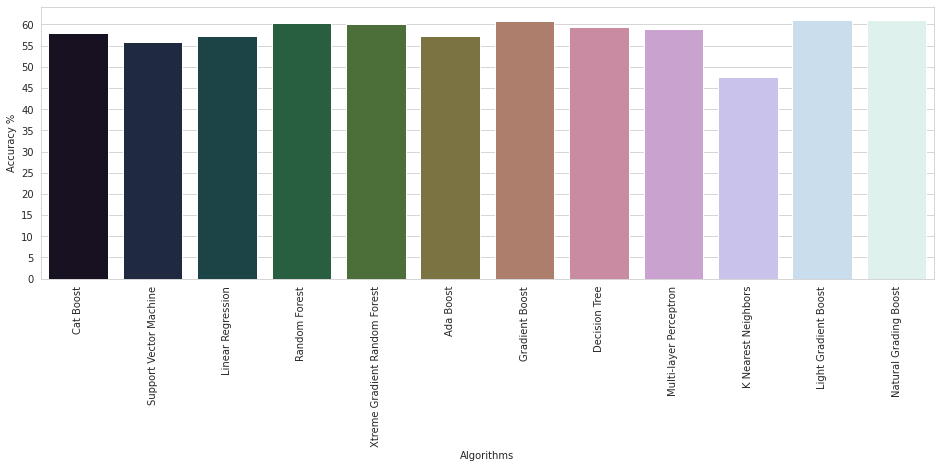

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

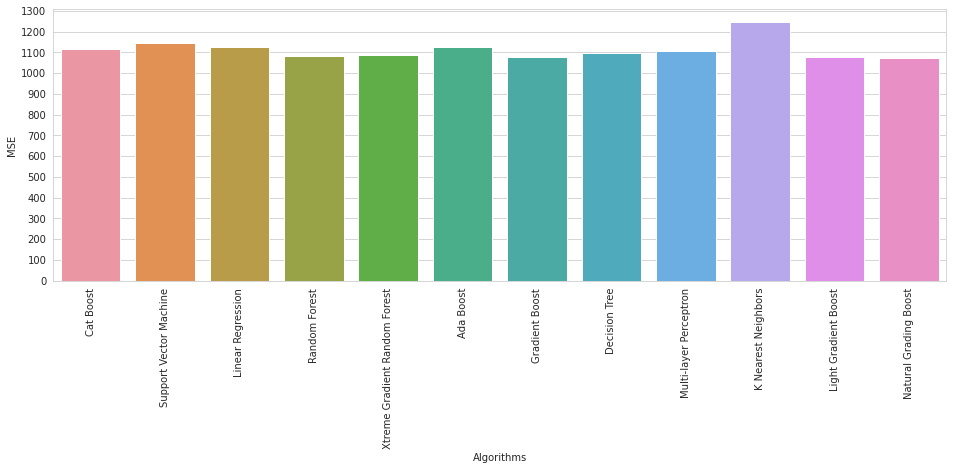

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1600,100))
plt.ylabel("MSE")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(rmse.keys()), y=list(rmse.values()))
plt.show()

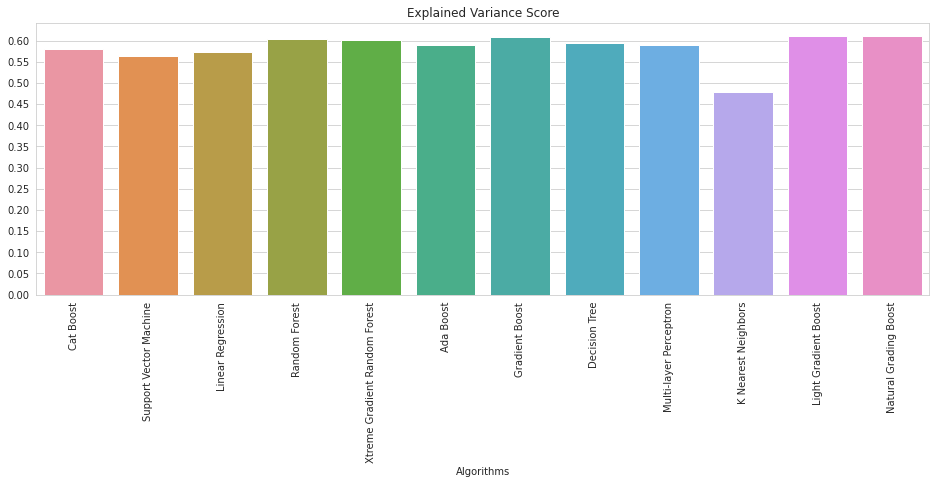

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.title("Explained Variance Score")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(explained_variance.keys()), y=list(explained_variance.values()))
plt.show()

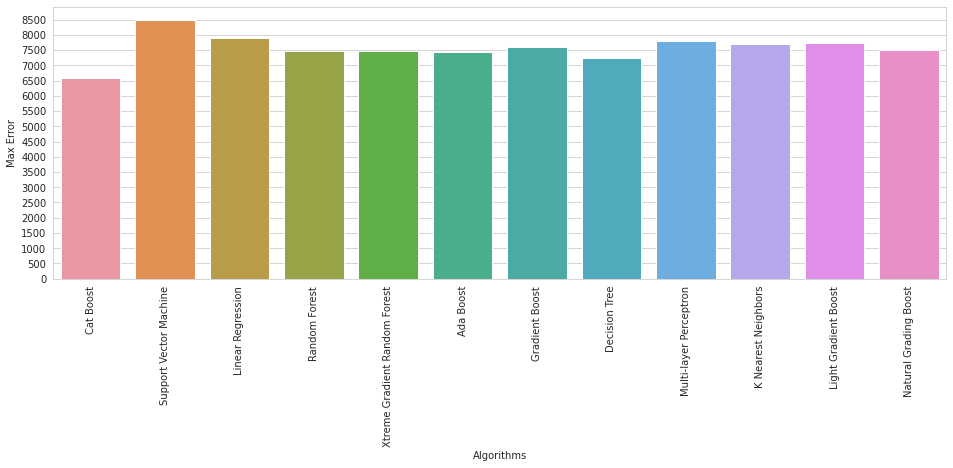

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,10000,500))
plt.ylabel("Max Error")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(max_error.keys()), y=list(max_error.values()))
plt.show()

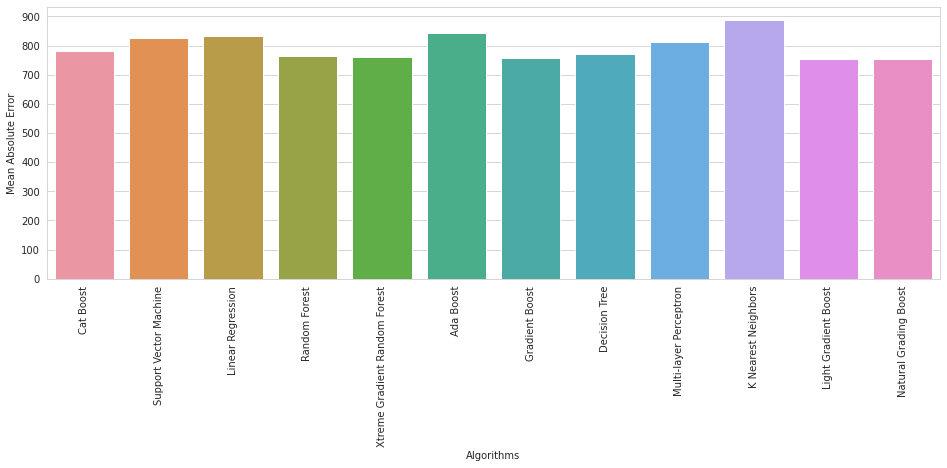

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1000, 100))
plt.ylabel("Mean Absolute Error")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x = list(MAE.keys()), y = list(MAE.values()))
plt.show()

We will use Gradient Boosting Regressor because we get less error with this method and more accuracy

In [ ]:
'''    
ngb = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr)
param = dict(n_estimators = [np.linspace(0,2000, 1000)])

rs = GridSearchCV(ngb, param, n_jobs=-1, cv=5, verbose=3)

rs.fit(df_x, df_y)

rs.best_score_*100'''

'''
best_estimator = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr, n_estimators=480)'''

'\nbest_estimator = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr, n_estimators=480)'

In [ ]:
ngb_1 = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr, n_estimators=480)

In [ ]:
train_model(ngb_1,'extra')

extra
[iter 0] loss=8.8424 val_loss=0.0000 scale=1.0000 norm=1324.8899
[iter 100] loss=8.3056 val_loss=0.0000 scale=2.0000 norm=1574.5746
[iter 200] loss=8.0935 val_loss=0.0000 scale=1.0000 norm=739.1748
[iter 300] loss=8.0122 val_loss=0.0000 scale=1.0000 norm=722.3157
[iter 400] loss=7.9849 val_loss=0.0000 scale=0.5000 norm=356.4311
R2_Score 61.115322978798915
RMSE :  1074.3636909942127
Explained_Variance :  0.6113010421730896
Max_Error :  7588.0533747734435
Mean Absolute Error 756.3299675168904


> New Accuracy is a little bit higher "64.89206436566914"
Lets use it for our New Prediction

In [ ]:
ngb_1.fit(df_x, df_y)

[iter 0] loss=7.9816 val_loss=0.0000 scale=1.0000 norm=716.5360
[iter 100] loss=7.9801 val_loss=0.0000 scale=1.0000 norm=714.5834
[iter 200] loss=7.9490 val_loss=0.0000 scale=0.5000 norm=354.4773
[iter 300] loss=7.9397 val_loss=0.0000 scale=0.5000 norm=350.8549
[iter 400] loss=7.9597 val_loss=0.0000 scale=0.5000 norm=357.7593


NGBRegressor(Base=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=15, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=100,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.LogScore'>, col_sample=0.5,
             learning_rate=0.01, minibatch_frac=0.5, n_estimators=480,
             natural_gradient=True,
             random_state=RandomState(MT19937) at 0x7FD611A73050, tol=0.0001,
             verb

In [ ]:
df_test.drop(['Item_Outlet_Sales'], axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test.shape

(5681, 17)

In [ ]:
df_test_ = pd.get_dummies(df_test)
df_test_.reset_index(drop=True, inplace=True)

In [ ]:
df_test['Item_Outlet_Sales'] = ngb_1.predict(df_test_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New,Item_MRP_cat,MRP_per_unit_weight,Outlet_Years,Item_Outlet_Sales
0,58,Food,Snack Foods,Low Fat,20.75000,0.00729,0.53511,107.86220,OUT049,1999,Medium,Tier 1,Supermarket Type1,perishable,b,5.19818,21,1501.81409
1,14,Food,Dairy,Regular,8.30000,0.03212,0.56319,87.31980,OUT017,2007,High,Tier 2,Supermarket Type1,perishable,b,10.52046,13,1267.30865
2,55,Non-Consumable,Others,Household,14.60000,0.06450,0.69625,241.75380,OUT010,1998,Small,Tier 3,Grocery Store,Not_Known,d,16.55848,22,536.52776
3,58,Food,Snack Foods,Low Fat,7.31500,0.01430,0.60390,155.03400,OUT017,2007,High,Tier 2,Supermarket Type1,perishable,c,21.19398,13,2397.75001
4,38,Food,Dairy,Regular,12.79285,0.07145,0.50150,234.23000,OUT027,1985,High,Tier 3,Supermarket Type3,perishable,d,18.30944,35,5708.62938


In [ ]:
df_test.to_csv('Predicted_sales.csv', index=None)

In [ ]:
submission = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']

In [ ]:
submission = df_test[submission]
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,58,OUT049,1501.81409
1,14,OUT017,1267.30865
2,55,OUT010,536.52776
3,58,OUT017,2397.75001
4,38,OUT027,5708.62938


In [ ]:
submission['Item_Identifier'] = test['Item_Identifier']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1501.81409
1,FDW14,OUT017,1267.30865
2,NCN55,OUT010,536.52776
3,FDQ58,OUT017,2397.75001
4,FDY38,OUT027,5708.62938


In [ ]:
submission.to_csv('submission.csv', index=None)